In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
DIR_NFL = 'data/nfl-health-and-safety-helmet-assignment/'
EXAMPLE_IMG_PATH = DIR_NFL + 'images/57502_001570_Sideline_frame1395.jpg'
EXAMPLE_IMG_PATH = DIR_NFL + 'images/57503_001581_Endzone_frame327.jpg'

In [22]:
def path_to_img(img_path):
    img = cv2.imread(img_path)
    return img


def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [23]:
img = path_to_img(EXAMPLE_IMG_PATH)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hls_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

In [24]:
hsv_img[:,:,0].max()

179

In [25]:
hsv_img[:,:,0].flatten()

array([105, 105, 102, ...,  48,  48,  48], dtype=uint8)

Distribution of the lightness


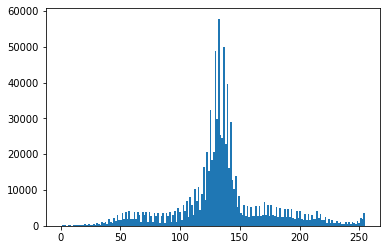

In [26]:
print("Distribution of the lightness")
h = plt.hist(hls_img[:,:,1].flatten(), bins=180)

Distribution of the lightness


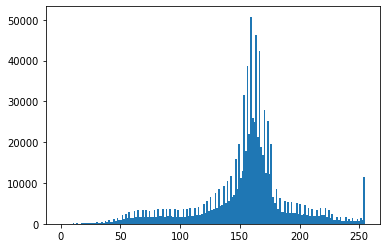

In [46]:
print("Distribution of the lightness")
h = plt.hist(hsv_img[:,:,2].flatten(), bins=180)

Distribution of the lightness


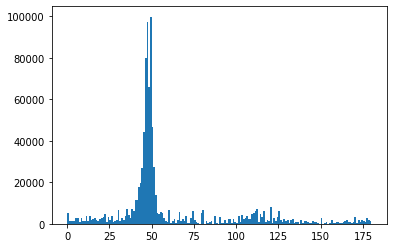

In [27]:
print("Distribution of the lightness")
h = plt.hist(hls_img[:,:,0].flatten(), bins=180)

Distribution of the hue


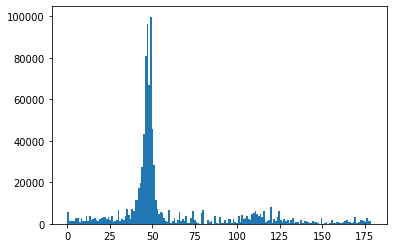

In [28]:
print("Distribution of the hue")
h = plt.hist(hsv_img[:,:,0].flatten(), bins=180)

In [47]:
bgr_lower_color = np.array([200,200,200])
bgr_upper_color = np.array([255,255,255])

hsv_lower_color = np.array([20,0,0])
hsv_upper_color = np.array([100,255,255])

hls_lower_color = np.array([0,160,0])
hls_upper_color = np.array([180,255,255])

In [48]:
bgr_mask = cv2.inRange(img, bgr_lower_color, bgr_upper_color)

hsv_mask = cv2.inRange(hsv_img, hsv_lower_color, hsv_upper_color)

hls_mask = cv2.inRange(hls_img, hls_lower_color, hls_upper_color)

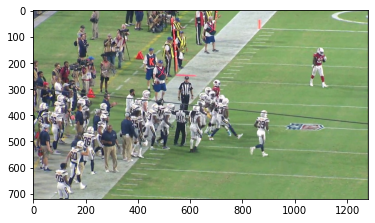

BGR
[200 200 200]
[255 255 255]


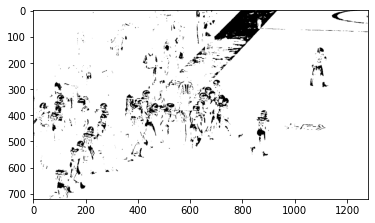

HSV
[20  0  0]
[100 255 255]


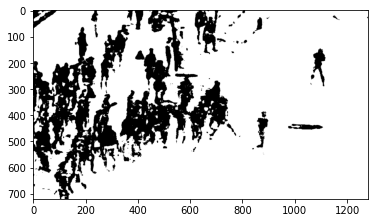

HLS
[  0 160   0]
[180 255 255]


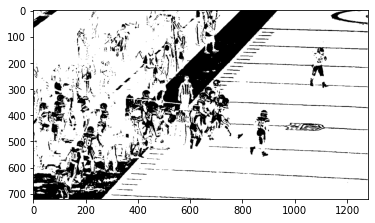

In [49]:
show_image(img)
print('BGR')
print(bgr_lower_color)
print(bgr_upper_color)
show_image(~bgr_mask)
print('HSV')
print(hsv_lower_color)
print(hsv_upper_color)
show_image(hsv_mask)
print('HLS')
print(hls_lower_color)
print(hls_upper_color)
show_image(~hls_mask)

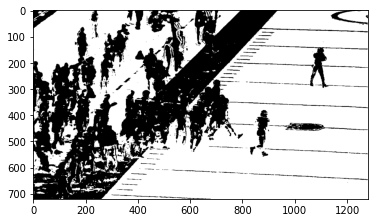

In [50]:

show_image(~hls_mask&hsv_mask)

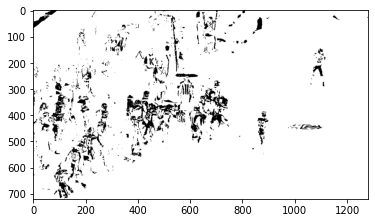

In [51]:

show_image(~hls_mask|hsv_mask)

In [52]:
final_mask = ~hls_mask&hsv_mask
#final_mask = ~hls_mask

In [53]:
def plot_mask2dilation(img, mask, do_plot=True, figsize=(10,10)):
    
    def plot_list(list2plot, n_col=1):
        n = len(list2plot)
        if n%n_col==0:
            n_row = n//n_col
        else:
            n_row = n//n_col + 1
        
        fig, axs = plt.subplots(n_row, n_col,figsize=(10,10))

        for k in range(n):
            axs[k//n_col, k%n_col].imshow(list2plot[k][0], list2plot[k][2])
            axs[k//n_col, k%n_col].set_title(list2plot[k][1])
        # remove empty subplots
        for k in range(n, n_row*n_col):
            print(n, k, k//n_col, k%n_col)
            fig.delaxes(axs[k//n_col, k%n_col])
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.85) # make space for title
        plt.show()

        return

    # image manipulations
    res = cv2.bitwise_and(img,img, mask= mask)
    gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
    kernel_size = 5
    blur = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    low_threshold = 10
    high_threshold = 200
    edges = cv2.Canny(blur, low_threshold, high_threshold)
    dilated = cv2.dilate(edges, np.ones((2,2), dtype=np.uint8))
    
    # plots
    list2plot = [
        (img, "Img", None), 
        (~mask, "~mask", "gray"), 
        (res, "bitwise_and", None), 
        (gray, "bitwise_and_gray", None), 
        (~blur, "~blur", "gray"), 
        (~edges, "Canny", "gray"), 
        (~dilated, "~dilated", "gray")
    ]
    
    if do_plot:
        plot_list(list2plot, n_col=4)

    return dilated




7 7 1 3


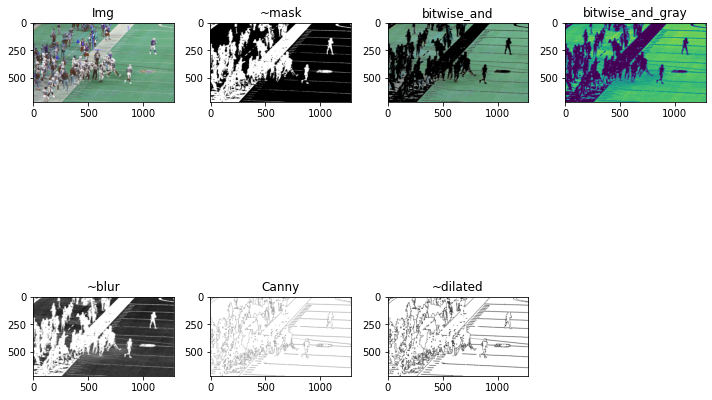

In [57]:
img = path_to_img(EXAMPLE_IMG_PATH)

dilated = plot_mask2dilation(img, final_mask, figsize=(15,15))




#### Canny transformation

https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e

#### Hough transformation

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

In [58]:
minLineLength = 100
maxLineGap = 5
#lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)
lines = cv2.HoughLines(dilated, 1, np.pi/180, 400)

# Green color in BGR 
LINE_COLOR = (255, 0, 0) 
"""
for l in lines:
    for x1, y1, x2, y2 in l:
        # cv2.line(image, start_point, end_point, color, thickness)
        cv2.line(img, (x1,y1), (x2,y2), LINE_COLOR, 3)


plt.imshow(img)
plt.title('Hough Lines')
plt.show()
"""

"\nfor l in lines:\n    for x1, y1, x2, y2 in l:\n        # cv2.line(image, start_point, end_point, color, thickness)\n        cv2.line(img, (x1,y1), (x2,y2), LINE_COLOR, 3)\n\n\nplt.imshow(img)\nplt.title('Hough Lines')\nplt.show()\n"

In [59]:
len(lines)

26

In [60]:
img = path_to_img(EXAMPLE_IMG_PATH)
for l in lines:
    for r,theta in l:
        
        # Stores the value of cos(theta) in a
        a = np.cos(theta)
    
        # Stores the value of sin(theta) in b
        b = np.sin(theta)
        
        # x0 stores the value rcos(theta)
        x0 = a*r
        
        # y0 stores the value rsin(theta)
        y0 = b*r
        
        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 10000*(-b))
        
        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 10000*(a))
    
        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 10000*(-b))
        
        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 10000*(a))
        
        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be 
        #drawn. In this case, it is red. 
        cv2.line(img,(x1,y1), (x2,y2), LINE_COLOR,5)


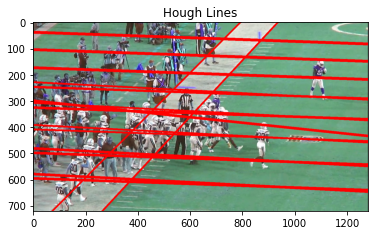

In [62]:
plt.imshow(img)
plt.title('Hough Lines')
plt.show()

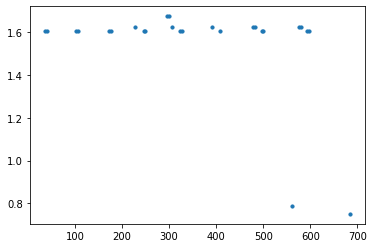

In [64]:
plt.scatter(lines[:, 0, 0], lines[:, 0, 1], s=10)

In [66]:
lines[:, 0, 0]

array([580., 299., 561., 577., 684., 482., 172., 296., 176., 324., 327.,
       497., 107., 500., 246., 103., 248., 594., 479., 307., 391.,  41.,
       409., 597.,  37., 228.], dtype=float32)

#lines: 319


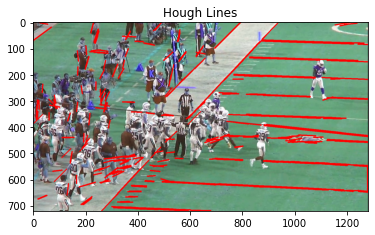

In [68]:
minLineLength = 40#100
maxLineGap = 5#5


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 100 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 30  # minimum number of pixels making up a line
max_line_gap = 5  # maximum gap in pixels between connectable line segments

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments

lines = cv2.HoughLinesP(dilated, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)






# Green color in BGR 
LINE_COLOR = (255, 0, 0) 

print('#lines:', len(lines))
img = path_to_img(EXAMPLE_IMG_PATH)
for l in lines:
    for x1, y1, x2, y2 in l:
        # cv2.line(image, start_point, end_point, color, thickness)
        cv2.line(img, (x1,y1), (x2,y2), LINE_COLOR, 3)


plt.imshow(img)
plt.title('Hough Lines')
plt.show()


In [ ]:
len(lines)

155

In [69]:
def angle_intercept(x1,y1,x2,y2):
    if x2==x1:
        assert y2!=y1, "No line: x2==x1, y2==y1"
        return np.pi/2, np.inf
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1     
    return [np.arctan(slope), intercept]

def len_segment(x1,y1,x2,y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def lines_features(lines:list):
    if len(lines)==0:
        return
    assert not any([len(line)!=4 for line in lines]), "Invalid lines format"
    return [[*angle_intercept(*line), len_segment(*line)] for line in lines]



In [70]:
lines_features([[0,1,2,3]])

[[0.7853981633974483, 1.0, 2.8284271247461903]]

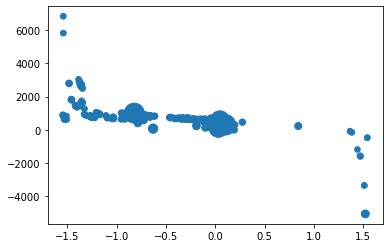

In [71]:
a_i = np.array(lines_features(lines[:, 0, :]))
plt.scatter(a_i[:, 0], a_i[:, 1], s=a_i[:, 2])

In [75]:
a_i

array([[ 4.96667230e-02,  5.83552632e+02,  3.42422254e+02],
       [ 9.96686525e-02,  3.02700000e+02,  3.01496269e+01],
       [-7.85398163e-01,  7.93000000e+02,  1.40007143e+02],
       [ 4.34508954e-02,  4.89739130e+02,  4.60434577e+01],
       [ 1.03167763e-01,  2.99681818e+02,  3.98116817e+02],
       [ 1.15759218e-01,  2.98209302e+02,  4.32897216e+01],
       [ 5.19762656e-02,  5.80335260e+02,  1.73233946e+02],
       [ 3.52418131e-02,  1.71958333e+02,  3.12193850e+02],
       [-8.17438477e-01,  9.97337748e+02,  2.20730605e+02],
       [ 4.54232794e-02,  4.87000000e+02,  1.32136293e+02],
       [ 4.92212951e-02,  5.80665025e+02,  2.03246156e+02],
       [ 1.05401391e-01,  3.00690176e+02,  3.99215481e+02],
       [ 3.35694739e-02,  1.08227612e+02,  2.68151077e+02],
       [ 3.21526584e-02,  1.06274854e+02,  3.42176855e+02],
       [ 3.53550365e-02,  1.74871383e+02,  3.11194473e+02],
       [ 3.35444596e-02,  3.25174497e+02,  2.98167738e+02],
       [ 3.36411495e-02,  3.28201923e+02

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [73]:
# scale parameters
scaler = MinMaxScaler()
scaler.fit(a_i[:, :2])
a_i_scaled = scaler.transform(a_i[:, :2])
 
kmeans = KMeans(n_clusters=6, random_state=0).fit(a_i_scaled, a_i[:, 2])
plt.scatter(a_i_scaled[:, 0], a_i_scaled[:, 1], s=a_i[:, 2], c=kmeans.labels_)

ValueError: Input contains infinity or a value too large for dtype('float64').

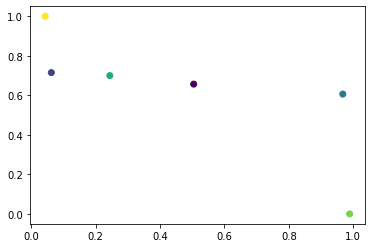

In [ ]:
kmeans.cluster_centers_
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=range(6))

In [ ]:
scaler.inverse_transform(a_i_scaled[kmeans.labels_==3])
a_i[:, :2][kmeans.labels_==3]-scaler.inverse_transform(a_i_scaled[kmeans.labels_==3])

array([[ 0.00000000e+00, -4.54747351e-13],
       [ 0.00000000e+00, -4.54747351e-13],
       [ 0.00000000e+00,  5.68434189e-13],
       [-1.11022302e-16,  0.00000000e+00],
       [ 0.00000000e+00,  4.54747351e-13],
       [ 0.00000000e+00,  5.68434189e-13],
       [ 0.00000000e+00,  4.54747351e-13],
       [ 0.00000000e+00, -4.54747351e-13],
       [ 0.00000000e+00, -2.27373675e-13],
       [ 1.11022302e-16,  0.00000000e+00],
       [ 0.00000000e+00,  4.54747351e-13],
       [ 0.00000000e+00, -1.13686838e-13],
       [ 0.00000000e+00,  5.68434189e-13],
       [ 0.00000000e+00,  1.13686838e-13],
       [ 0.00000000e+00,  4.54747351e-13],
       [ 0.00000000e+00, -3.69482223e-13]])

(array([ 1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 10.,  3.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         3.,  0.,  3.,  2.,  2., 13., 66., 23.,  7.,  2.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  4.]),
 array([-88.63607247, -86.65122722, -84.66638197, -82.68153672,
        -80.69669147, -78.71184622, -76.72700097, -74.74215572,
        -72.75731047, -70.77246522, -68.78761997, -66.80277472,
        -64.81792947, -62.83308422, -60.84823897, -58.86339372,
        -56.87854847, -54.89370322, -52.90885797, -50.92401273,
        -48.93916748, -46.95432223, -44.96947698, -42.98463173,
        -40.99978648, -39.01494123, -37.03009598, -35.04525073,
        -33.06040548, -31.07556023, -29.0907

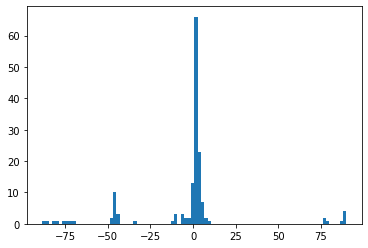

In [ ]:
plt.hist(a_i[:,0]*180/np.pi, bins=90)


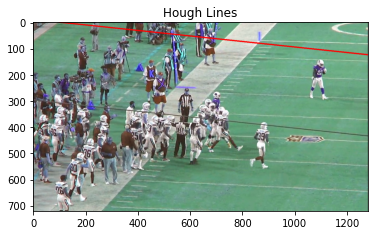

In [ ]:
img = path_to_img(EXAMPLE_IMG_PATH)
cv2.line(img, (100,0), (2000,200), LINE_COLOR, 3)
plt.imshow(img)
plt.title('Hough Lines')
plt.show()

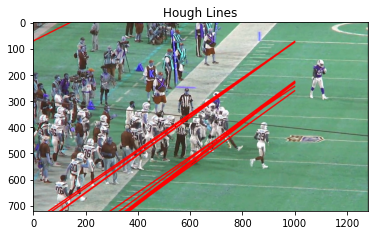

In [ ]:
a_i_scaled[kmeans.labels_==3]
scaler.inverse_transform(a_i_scaled[kmeans.labels_==3])

img = path_to_img(EXAMPLE_IMG_PATH)

for l in a_i[:, :2][kmeans.labels_==3]:
    x1, y1, x2, y2 = features2lines(np.tan(l[0]), l[1], x_max=1000)
    # cv2.line(image, start_point, end_point, color, thickness)
    cv2.line(img, (x1,y1), (x2,y2), LINE_COLOR, 3)

plt.imshow(img)
plt.title('Hough Lines')
plt.show()

array([[ 2.59725007e-02,  3.68770599e+02],
       [-1.35291364e+00,  1.05621482e+03],
       [ 1.47049449e+00, -2.25653061e+02],
       [-7.86103642e-01,  8.77236557e+02],
       [ 1.53691100e+00, -7.37850000e+03],
       [-1.41144469e+00,  4.41944444e+03]])

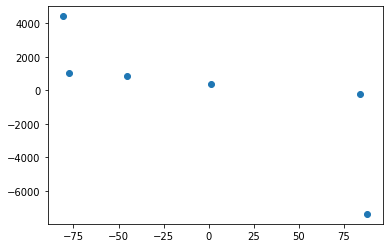

In [ ]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0]*180/np.pi, centroids[:, 1])
centroids

In [ ]:
centroids.astype(int)

array([[    0,   368],
       [   -1,  1056],
       [    1,  -225],
       [    0,   877],
       [    1, -7378],
       [   -1,  4419]])

In [ ]:
def features2lines(slope, intercept, x_max=1000):
    x0 = 0
    y0 = int(intercept)
    x1 = x_max
    y1 = int(slope*img.shape[0] + intercept)
    return [x0, y0, x1, y1]

    

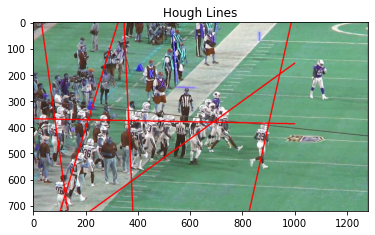

In [ ]:
img = path_to_img(EXAMPLE_IMG_PATH)

for l in centroids:
    x1, y1, x2, y2 = features2lines(np.tan(l[0]), l[1], x_max=1000)
    # cv2.line(image, start_point, end_point, color, thickness)
    cv2.line(img, (x1,y1), (x2,y2), LINE_COLOR, 3)

plt.imshow(img)
plt.title('Hough Lines')
plt.show()

In [ ]:
def abline(img, slope, intercept):
    """Plot a line from slope and intercept"""
    print( slope, intercept)
    x0 = 0
    y0 = int(intercept)
    x1 = img.shape[0]
    y1 = int(slope*img.shape[0] + intercept)
    cv2.line(img,(x0,y0), (x1,y1), LINE_COLOR,5)
    print((x0,y0), (x1,y1))

In [ ]:
img.shape

(720, 1280, 3)

In [ ]:
centroid

array([-1.41144469e+00,  4.41944444e+03])

0.02597834239349403 368.77059877656524
(0, 368) (720, 387)
-4.516767335264189 1056.2148208933927
(0, 1056) (720, -2195)
9.936450368411998 -225.6530612244902
(0, -225) (720, 6928)
-1.001411953577563 877.23655672931
(0, 877) (720, 156)
29.499999999999826 -7378.500000000001
(0, -7378) (720, 13861)
-6.222222222222221 4419.444444444444
(0, 4419) (720, -60)


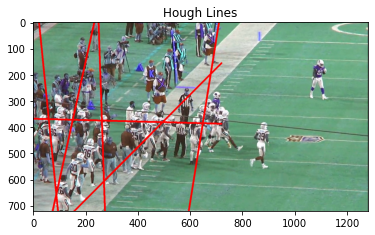

In [ ]:
img = path_to_img(EXAMPLE_IMG_PATH)

for centroid in centroids:
    abline(img, np.tan(centroid[0]), centroid[1])

plt.imshow(img)
plt.title('Hough Lines')
plt.show()

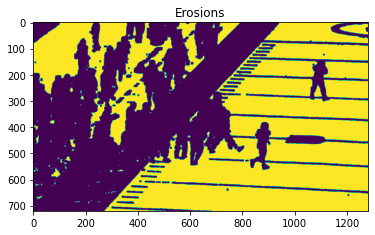

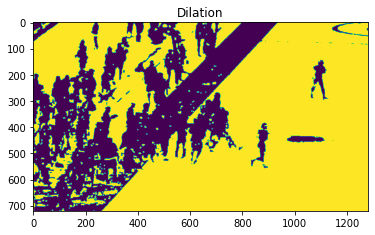

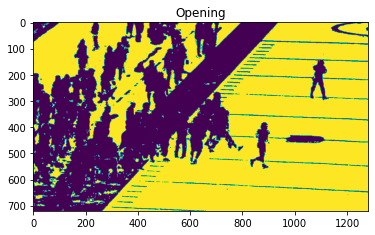

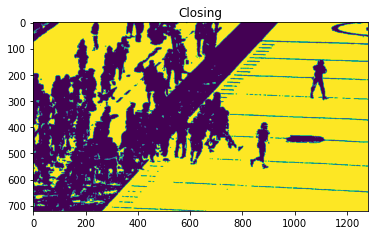

In [ ]:
# Erosion
kernel = np.ones((2,2),np.uint8)
erosions2 = cv2.erode(final_mask, kernel, iterations = 5)
plt.imshow(erosions2)
plt.title('Erosions')
plt.show()

# Dilation
dilation = cv2.dilate(final_mask, kernel, iterations = 3)
plt.imshow(dilation)
plt.title('Dilation')
plt.show()

# Opening
opening = cv2.morphologyEx(final_mask, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.title('Opening')
plt.show()

# Closing
closing = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.title('Closing')
plt.show()

In [ ]:
def houg_line_to_polar(line):
    x1, y1, x2, y2 = line
    theta = np.arctan(-(x2-x1)/(y2-y1))
    rho = x1 * np.cos(theta) + y1 * np.sen(theta)
    return rho, theta

def 


In [ ]:
from skimage.transform import hough_line, hough_line_peaks
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(dilated, theta=tested_angles)

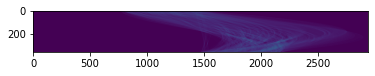

In [ ]:
plt.imshow(h.T)

In [ ]:
t_hough = 700

#h_2 = h[(h>t_hough).astype(int)]

#plt.imshow(h_2)

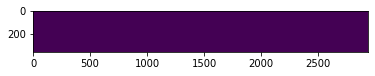

In [ ]:
plt.imshow((h>t_hough).astype(int).T)
plt.show()

In [ ]:
(h>t_hough).astype(int).sum().sum()

1